In [1]:
import os

In [2]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install split-folders tqdm

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [5]:
import splitfolders
input_folder = "C:/Users/User/Documents/Tugas-Akhir-Kel02/Dataset"
output = "C:/Users/User/Documents/Tugas-Akhir-Kel02/Result_Dataset"

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .1, .1))

Copying files: 900 files [00:24, 36.36 files/s]


In [6]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(
                  rescale = 1./255
)

In [8]:
base_dir = 'C:/Users/User/Documents/Tugas-Akhir-Kel02/Result_Dataset'
%ls "C:/Users/User/Documents/Tugas-Akhir-Kel02/Result_Dataset"

 Volume in drive C is Y
 Volume Serial Number is A486-8D35

 Directory of C:\Users\User\Documents\Tugas-Akhir-Kel02\Result_Dataset

05/27/2022  03:56 PM    <DIR>          .
05/27/2022  03:56 PM    <DIR>          ..
05/27/2022  03:56 PM    <DIR>          test
05/27/2022  03:56 PM    <DIR>          train
05/27/2022  03:56 PM    <DIR>          val
               0 File(s)              0 bytes
               5 Dir(s)  97,130,463,232 bytes free


In [9]:
import os

test_dir = os.path.join(base_dir, 'C:/Users/User/Documents/Tugas-Akhir-Kel02/Result_Dataset/test')
train_dir = os.path.join(base_dir, 'C:/Users/User/Documents/Tugas-Akhir-Kel02/Result_Dataset/train')
val_dir = os.path.join(base_dir, 'C:/Users/User/Documents/Tugas-Akhir-Kel02/Result_Dataset/val')

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

val_generator = train_datagen.flow_from_directory(
    val_dir,
    target_size = (150, 150),
    batch_size = 32, 
    class_mode = 'categorical'
)

Found 720 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import math
import shutil
import glob
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D

In [15]:
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(250, activation = 'relu'),
          tf.keras.layers.Dropout(0.3),
          tf.keras.layers.Dense(3, activation = 'softmax')
])

In [16]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('val_accuracy') > 0.90):
      print('\nAccuracy better than target training!')
      self.model.stop_training = True

callbacks = myCallback()

In [17]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001),
              metrics = ['accuracy'])

In [18]:
%%time
history = model.fit(
            train_generator,
            epochs = 40,
            validation_data = val_generator,
            callbacks = [callbacks]
)

Epoch 1/40
23/23 [==============================] - 22s 817ms/step - loss: 1.0800 - accuracy: 0.3417 - val_loss: 1.0486 - val_accuracy: 0.3667
Epoch 2/40
23/23 [==============================] - 15s 656ms/step - loss: 1.0315 - accuracy: 0.5889 - val_loss: 0.9981 - val_accuracy: 0.6111
Epoch 3/40
23/23 [==============================] - 15s 661ms/step - loss: 0.9770 - accuracy: 0.6333 - val_loss: 0.9313 - val_accuracy: 0.7778
Epoch 4/40
23/23 [==============================] - 15s 666ms/step - loss: 0.9104 - accuracy: 0.7347 - val_loss: 0.8529 - val_accuracy: 0.7667
Epoch 5/40
23/23 [==============================] - 16s 684ms/step - loss: 0.8320 - accuracy: 0.7611 - val_loss: 0.7655 - val_accuracy: 0.8111
Epoch 6/40
23/23 [==============================] - 16s 709ms/step - loss: 0.7549 - accuracy: 0.7750 - val_loss: 0.6948 - val_accuracy: 0.7778
Epoch 7/40
23/23 [==============================] - 16s 705ms/step - loss: 0.6853 - accuracy: 0.7861 - val_loss: 0.6357 - val_accuracy: 0.7667

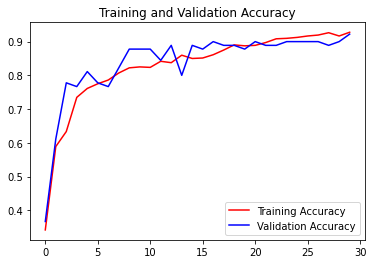

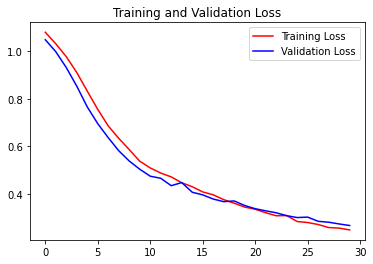

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.image as mping
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc = 'best')
plt.show()

In [31]:
model.save("C:/Users/User/Documents/Tugas-Akhir-Kel02/Model/model_TA.h5")

In [32]:
akurasi_test_generator = train_datagen.flow_from_directory(
'C:/Users/User/Documents/Tugas-Akhir-Kel02/Dataset',
target_size=(150,150),
batch_size=32,
class_mode='categorical',
)

Found 900 images belonging to 3 classes.


In [33]:
results = model.evaluate(akurasi_test_generator)
print("test loss, test acc:", results)

29/29 [==============================] - 11s 371ms/step - loss: 0.2507 - accuracy: 0.9256
test loss, test acc: [0.250730961561203, 0.9255555272102356]
